In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
from sklearn import datasets, linear_model

ImportError: No module named 'surprise'

#### Reading data

In [58]:
df = pd.read_csv('house_price_data.csv')

In [59]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [60]:
df.shape

(1460, 81)

In [61]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))


Number of duplicate rows = 0


In [1]:
!pip install surprise

     |████████████████████████████████| 6.5MB 29kB/s  eta 0:00:01     |█████████▉                      | 2.0MB 3.4MB/s eta 0:00:02
     |████████████████████████████████| 296kB 10.3MB/s eta 0:00:01
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp35-cp35m-linux_x86_64.whl size=1658186 sha256=5cc0ae8ddf1f5c5656a00626f439d767bbc9d8d41c14b36f3f584cc3cab9805c
  Stored in directory: /home/nbuser/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise
You should consider upgrading via the 'pip install --upgrade pip' command.


In [62]:
## Target feature
y = df['SalePrice']
x= np.array(df['OverallQual']).reshape(-1,1)
model=LinearRegression()
model.fit(x,y)

y.shape

(1460,)

#### Dropping target feature and nonessential feature

In [63]:
df.drop(['SalePrice', 'Id'], axis=1,inplace=True)

#### Checking columns with null values

In [64]:
df_null = []
for col in df.columns:
    n = df[col].isnull().sum()
    if(n>0):
        df_null.append(col)
        print('%s: %d' % (col,n))

LotFrontage: 259
Alley: 1369
MasVnrType: 8
MasVnrArea: 8
BsmtQual: 37
BsmtCond: 37
BsmtExposure: 38
BsmtFinType1: 37
BsmtFinType2: 38
Electrical: 1
FireplaceQu: 690
GarageType: 81
GarageYrBlt: 81
GarageFinish: 81
GarageQual: 81
GarageCond: 81
PoolQC: 1453
Fence: 1179
MiscFeature: 1406


In [65]:
df2 = df[df_null]
df2.dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

#### Dropping columns with object type having null values

In [66]:
cols_to_drop = []
cols_na = []
for col in df2.columns:
    if df[col].dtype == 'O':
        cols_to_drop.append(col)
    else:
        cols_na.append(col)
print(cols_to_drop);

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [67]:
df.drop(cols_to_drop, axis=1, inplace=True)
df.shape

(1460, 63)

In [68]:
for col in df.columns:
    n = df[col].isnull().sum()
    if(n>0):
#         df_null.append(col)
        print('%s: %d' % (col,df[col].isnull().sum()))

LotFrontage: 259
MasVnrArea: 8
GarageYrBlt: 81


In [69]:
for col in df.columns:
    n = df[col].isnull().sum()
    if(n>0):
        print('Before replacing missing values:')
        print(df[col].iloc[40:45])
#         df = df.fillna(df.median())
#         print('\nAfter replacing missing values:')
#         print(df[col].iloc[40:45])

Before replacing missing values:
40     84.0
41    115.0
42      NaN
43      NaN
44     70.0
Name: LotFrontage, dtype: float64
Before replacing missing values:
40    101.0
41      0.0
42      0.0
43      0.0
44      0.0
Name: MasVnrArea, dtype: float64
Before replacing missing values:
40    1965.0
41    1959.0
42    1983.0
43    1977.0
44    1959.0
Name: GarageYrBlt, dtype: float64


#### Replacing null columns with median values

In [70]:
df = df.fillna(df.median())
for col in cols_na:
    print('\nAfter replacing missing values:')
    print(df[col].iloc[40:45])


After replacing missing values:
40     84.0
41    115.0
42     69.0
43     69.0
44     70.0
Name: LotFrontage, dtype: float64

After replacing missing values:
40    101.0
41      0.0
42      0.0
43      0.0
44      0.0
Name: MasVnrArea, dtype: float64

After replacing missing values:
40    1965.0
41    1959.0
42    1983.0
43    1977.0
44    1959.0
Name: GarageYrBlt, dtype: float64


In [71]:
df.shape

(1460, 63)

In [72]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
                  ...   
CentralAir        object
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64


### Converting strings to categorical values using Label Encoder

In [73]:
print(df['SaleType'].unique())

['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']


In [74]:
for i in range(df.shape[1]):
    if df.iloc[:,i].dtypes == object:
        le = preprocessing.LabelEncoder()
        le.fit(list(df.iloc[:,i].values))
        df.iloc[:,i] = le.transform(list(df.iloc[:,i].values))

print(df['SaleType'].unique())

[8 6 0 3 4 1 5 2 7]


### Normality check for the target

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


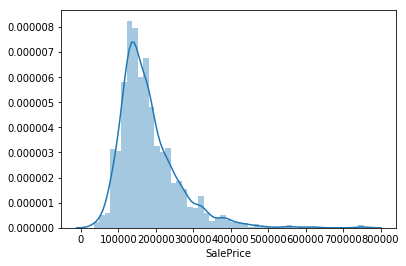

In [75]:
ax = sns.distplot(y)
plt.show()

### log-transform to make normally distributed

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


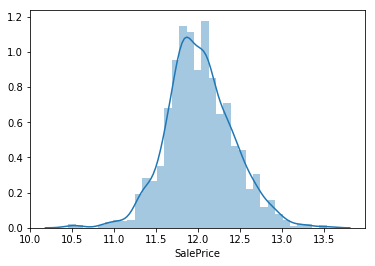

In [76]:
y = np.log(y)
ax = sns.distplot(y)
plt.show()

In [77]:
y[0:10]

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
5    11.870600
6    12.634603
7    12.206073
8    11.774520
9    11.678440
Name: SalePrice, dtype: float64

### Random Forest for feature extraction

Training done using Random Forest


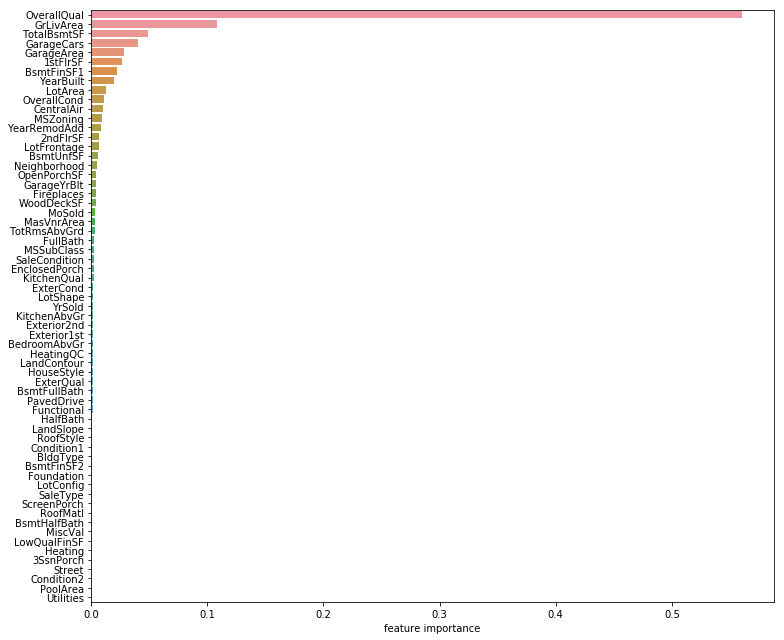

In [78]:
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(df, y)
print('Training done using Random Forest')

ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x=rf.feature_importances_[ranking], y=df.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()


#### Selecting top 30 features 

In [79]:
X = df.iloc[:,ranking[:30]]

In [80]:
X.shape

(1460, 30)

In [81]:
X.head()

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,GarageArea,1stFlrSF,BsmtFinSF1,YearBuilt,LotArea,OverallCond,...,WoodDeckSF,MoSold,MasVnrArea,TotRmsAbvGrd,FullBath,MSSubClass,SaleCondition,EnclosedPorch,KitchenQual,ExterCond
0,7,1710,856,2,548,856,706,2003,8450,5,...,0,2,196.0,8,2,60,4,0,2,4
1,6,1262,1262,2,460,1262,978,1976,9600,8,...,298,5,0.0,6,2,20,4,0,3,4
2,7,1786,920,2,608,920,486,2001,11250,5,...,0,9,162.0,6,2,60,4,0,2,4
3,7,1717,756,3,642,961,216,1915,9550,5,...,0,2,0.0,7,1,70,0,272,2,4
4,8,2198,1145,3,836,1145,655,2000,14260,5,...,192,12,350.0,9,2,60,4,0,2,4


### Normalizing numerical features using zscoring

In [82]:
X = (X - X.mean())/X.std()
X.head()

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,GarageArea,1stFlrSF,BsmtFinSF1,YearBuilt,LotArea,OverallCond,...,WoodDeckSF,MoSold,MasVnrArea,TotRmsAbvGrd,FullBath,MSSubClass,SaleCondition,EnclosedPorch,KitchenQual,ExterCond
0,0.651256,0.370207,-0.459145,0.311618,0.350880,-0.793162,0.575228,1.050634,-0.207071,-0.517023,...,-0.751918,-1.598563,0.513928,0.911897,0.789470,0.073350,0.208431,-0.359202,-0.409229,0.364083
1,-0.071812,-0.482347,0.466305,0.311618,-0.060710,0.257052,1.171591,0.156680,-0.091855,2.178881,...,1.625638,-0.488943,-0.570555,-0.318574,0.789470,-0.872264,0.208431,-0.359202,0.795356,0.364083
2,0.651256,0.514836,-0.313261,0.311618,0.631510,-0.627611,0.092875,0.984415,0.073455,-0.517023,...,-0.751918,0.990552,0.325803,-0.318574,0.789470,0.073350,0.208431,-0.359202,-0.409229,0.364083
3,0.651256,0.383528,-0.687089,1.649742,0.790533,-0.521555,-0.499103,-1.862993,-0.096864,-0.517023,...,-0.751918,-1.598563,-0.570555,0.296662,-1.025689,0.309753,-3.425110,4.091122,-0.409229,0.364083
4,1.374324,1.298881,0.199611,1.649742,1.697903,-0.045596,0.463410,0.951306,0.375020,-0.517023,...,0.779930,2.100173,1.366021,1.527133,0.789470,0.073350,0.208431,-0.359202,-0.409229,0.364083


### Outlier Detection

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


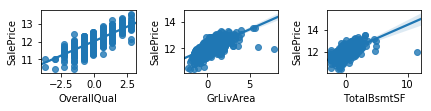

In [83]:
fig = plt.figure(figsize=(12,7))
for i in np.arange(3):
    ax = fig.add_subplot(5,6,i+1)
    sns.regplot(x=X.iloc[:,i], y=y)

plt.tight_layout()
plt.show()


#### Removing few outliers

In [84]:
Xout = X
Xout['SalePrice'] = y
Xout = Xout.drop(Xout[(Xout['TotalBsmtSF']>5) & (Xout['SalePrice']<12.5)].index)
Xout = Xout.drop(Xout[(Xout['GrLivArea']>5) & (Xout['SalePrice']<13)].index)
Xout.shape

(1458, 31)

In [85]:
y = Xout['SalePrice']
X = Xout.drop(['SalePrice'], axis=1)

### Splitting the data into train and test with 70:30 ratio

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [99]:
print(y_train)

250     11.245046
228     11.736069
40      11.982929
428     12.182804
278     12.936752
701     11.849398
336     12.841130
95      12.128111
681     11.979385
779     11.813030
30      10.596635
695     12.078239
954     11.755872
1456    12.254863
595     12.672946
600     12.524526
935     11.288531
417     12.384219
317     12.506177
1080    11.884489
624     12.014609
588     11.870600
7       12.206073
949     12.193494
693     11.594321
1126    12.066811
903     12.388394
697     11.723996
708     12.098153
1138    12.185870
          ...    
597     12.176649
1457    12.493130
39      11.314475
340     12.220469
2       12.317167
451     12.542545
1093    11.891362
1233    11.863582
609     11.682668
420     12.237087
1278    12.375815
847     11.801857
1365    12.283034
1435    12.066811
111     12.100712
224     12.864240
943     11.870600
73      11.883799
47      12.428015
639     12.485827
113     12.287653
96      12.273731
1239    12.490876
1148    11.669074
106     11

In [125]:
X_train.shape
x=X_train['GrLivArea']
print(str(y_train) +" x is "+str(x))

250     11.245046
228     11.736069
40      11.982929
428     12.182804
278     12.936752
701     11.849398
336     12.841130
95      12.128111
681     11.979385
779     11.813030
30      10.596635
695     12.078239
954     11.755872
1456    12.254863
595     12.672946
600     12.524526
935     11.288531
417     12.384219
317     12.506177
1080    11.884489
624     12.014609
588     11.870600
7       12.206073
949     12.193494
693     11.594321
1126    12.066811
903     12.388394
697     11.723996
708     12.098153
1138    12.185870
          ...    
597     12.176649
1457    12.493130
39      11.314475
340     12.220469
2       12.317167
451     12.542545
1093    11.891362
1233    11.863582
609     11.682668
420     12.237087
1278    12.375815
847     11.801857
1365    12.283034
1435    12.066811
111     12.100712
224     12.864240
943     11.870600
73      11.883799
47      12.428015
639     12.485827
113     12.287653
96      12.273731
1239    12.490876
1148    11.669074
106     11

In [126]:
X_test.shape

(438, 30)

In [127]:
y_train.shape

(1020,)

In [128]:
y_test.shape

(438,)

In [129]:
X_train.describe()

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,GarageArea,1stFlrSF,BsmtFinSF1,YearBuilt,LotArea,OverallCond,...,WoodDeckSF,MoSold,MasVnrArea,TotRmsAbvGrd,FullBath,MSSubClass,SaleCondition,EnclosedPorch,KitchenQual,ExterCond
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,...,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,-0.003049,-0.010774,-0.008537,-0.011106,-0.016341,-0.002572,0.025591,-0.003543,-0.003238,-0.020131,...,0.014710,0.010749,-0.002991,-0.006734,-0.002438,-0.011941,-0.021337,-0.013205,0.015919,0.022463
std,1.011416,0.974854,0.969260,0.996109,0.974106,0.969380,0.974053,1.004780,1.022167,1.006434,...,1.017050,1.011339,0.983350,1.003125,0.986298,1.002120,1.029461,0.993073,0.977446,0.971684
min,-3.687150,-2.248350,-2.410341,-2.364630,-2.212205,-2.143438,-0.972685,-3.286697,-0.923413,-4.111561,...,-0.751918,-1.968437,-0.570555,-2.779517,-2.840849,-0.872264,-3.425110,-0.359202,-2.818399,-5.101838
25%,-0.794879,-0.724506,-0.598761,-1.026506,-0.640678,-0.733020,-0.972685,-0.571727,-0.296889,-0.517023,...,-0.751918,-0.488943,-0.570555,-0.933810,-1.025689,-0.872264,0.208431,-0.359202,-0.409229,0.364083
50%,-0.071812,-0.113161,-0.137745,0.311618,0.032833,-0.186573,-0.101162,0.057352,-0.105030,-0.517023,...,-0.751918,-0.119069,-0.570555,-0.318574,0.789470,-0.163054,0.208431,-0.359202,0.795356,0.364083
75%,0.651256,0.494379,0.547795,0.311618,0.481841,0.591388,0.637166,0.951306,0.112879,0.381612,...,0.588449,0.620678,0.350702,0.296662,0.789470,0.309753,0.208431,-0.359202,0.795356,0.364083
max,2.820459,5.633962,4.883849,2.987865,3.493933,5.342573,3.824529,1.282400,20.511245,3.077516,...,6.085550,2.100173,7.054021,4.603312,2.604629,3.146594,1.116816,8.672338,0.795356,0.364083


In [131]:
y_train.describe()

count    1020.000000
mean       12.023015
std         0.406774
min        10.460242
25%        11.767083
50%        11.995352
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

In [130]:
X_test.describe()

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,GarageArea,1stFlrSF,BsmtFinSF1,YearBuilt,LotArea,OverallCond,...,WoodDeckSF,MoSold,MasVnrArea,TotRmsAbvGrd,FullBath,MSSubClass,SaleCondition,EnclosedPorch,KitchenQual,ExterCond
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,...,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,-0.005778,-0.006570,-0.017242,0.021386,0.023575,-0.026520,-0.094719,0.002774,-0.011432,0.049240,...,-0.038509,-0.023645,-0.010110,0.001686,-0.002072,0.027472,0.044590,0.032391,-0.024202,-0.053973
std,0.957527,0.947866,0.890257,1.008851,1.035237,0.946720,0.884309,0.988885,0.903696,0.985983,...,0.959534,0.969409,1.009801,0.974026,1.026332,0.997926,0.926651,1.018336,1.036017,1.064117
min,-2.241014,-1.565165,-2.410341,-2.364630,-2.212205,-2.045142,-0.972685,-3.021822,-0.900069,-2.314292,...,-0.751918,-1.968437,-0.570555,-2.164281,-2.840849,-0.872264,-3.425110,-0.359202,-2.818399,-5.101838
25%,-0.794879,-0.768275,-0.595911,-1.026506,-0.703820,-0.720733,-0.972685,-0.596559,-0.298116,-0.517023,...,-0.751918,-0.858816,-0.570555,-0.933810,-1.025689,-0.872264,0.208431,-0.359202,-0.409229,0.364083
50%,-0.071812,-0.069391,-0.208407,0.311618,0.023479,-0.234427,-0.228327,0.024242,-0.102775,-0.517023,...,-0.751918,-0.119069,-0.570555,-0.318574,0.789470,-0.163054,0.208431,-0.359202,0.795356,0.364083
75%,0.651256,0.508651,0.534118,0.311618,0.481841,0.569401,0.478757,0.951306,0.097425,0.381612,...,0.550552,0.620678,0.311971,0.296662,0.789470,0.309753,0.208431,-0.359202,0.795356,0.364083
max,2.820459,3.982140,4.897526,2.987865,4.289051,4.488951,3.201856,1.249290,14.876188,3.077516,...,4.577637,2.100173,8.282363,3.372840,2.604629,3.146594,1.116816,4.565605,0.795356,0.364083


In [94]:
y_test.describe()

count    438.000000
mean      12.026323
std        0.383219
min       10.542706
25%       11.799417
50%       12.013701
75%       12.277811
max       13.275828
Name: SalePrice, dtype: float64

0.524421103018032
0.06890071552592401


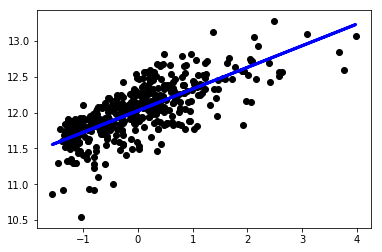

In [132]:
x= np.array(X_train['GrLivArea']).reshape(-1,1)
model=LinearRegression()
model.fit(x,y_train)
print(model.score(x, y_train))
x_new=np.array(X_test['GrLivArea']).reshape(-1,1)
y_pred=model.predict(x_new)
rmse=mean_squared_error(y_test, y_pred)
print(rmse)
plt.scatter(x_new, y_test,  color='black')
plt.plot(x_new, y_pred, color='blue', linewidth=3)

In [150]:
X_train.shape

(1020, 30)

In [151]:
y_train.shape

(1020,)

In [145]:
cols = ['OverallQual', 'GrLivArea', 'TotalBsmtSF']
df2 = df[cols]

In [146]:
df2.head()

,OverallQual
0,7
1,6
2,7
3,7
4,8


In [153]:
X_train_mlr = X_train[['OverallQual', 'GrLivArea', 'TotalBsmtSF']]

In [155]:
X_train_mlr[:1]

,OverallQual,GrLivArea,TotalBsmtSF
250,-2.241014,-0.398614,-0.750913


In [156]:
X_test_mlr = X_test[['OverallQual', 'GrLivArea', 'TotalBsmtSF']]

In [158]:
mlr = LinearRegression()
mlr.fit(X_train_mlr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [159]:
mlr.score(X_train_mlr, y_train)

0.8160200787610811

In [160]:
y_pred_mlr = mlr.predict(X_test_mlr)

In [161]:
np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred_mlr))

0.18008704069744552

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


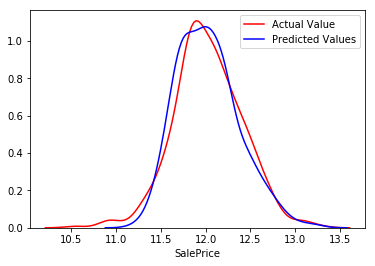

In [162]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_mlr, hist=False, color="b", label="Predicted Values" , ax=ax1)

In [165]:
test_set_r2 = r2_score(y_test, y_pred_mlr)

In [166]:
print(test_set_r2)

0.7786583314360516
